In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import platform
import PIL
from collections import Counter
# 통계적 검증 
from scipy import stats

import matplotlib
import seaborn as sns
# plot 한글 깨짐 방지
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/malgun.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

C:\Users\thddu\AppData\Local\Temp\ipykernel_11296\1437390534.py:14: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


## 데이터 가져오기 및 전처리

In [77]:
data = pd.read_csv('./data/Video_Games.csv')
data.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [79]:
video_games = data[['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
video_games.head(2)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [80]:
video_games.isnull().sum()

Name                 2
Platform             0
Year_of_Release    269
Genre                2
Publisher           54
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
dtype: int64

In [81]:
# 출시년도 결측치 최저값으로 변환
video_games['Year_of_Release'] = video_games['Year_of_Release'].fillna(1980)
video_games['Year_of_Release'].astype('int')
video_games.isnull().sum()

C:\Users\thddu\AppData\Local\Temp\ipykernel_11296\3529571238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video_games['Year_of_Release'] = video_games['Year_of_Release'].fillna(1980)


Name                2
Platform            0
Year_of_Release     0
Genre               2
Publisher          54
NA_Sales            0
EU_Sales            0
JP_Sales            0
Other_Sales         0
Global_Sales        0
dtype: int64

In [82]:
video_games[video_games['Year_of_Release']>2016]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5936,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29
14086,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.04,0.00,0.04
16222,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01
16385,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01


In [95]:
video_games = video_games[video_games['Year_of_Release']<2017]

In [113]:
video_games_fin = video_games.dropna(axis=0)
video_games_fin

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01


In [85]:
video_games_fin.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64

## 시각화

In [19]:
df_Year_Genre_Global = video_games_fin.groupby(['Year_of_Release','Genre'],as_index=True)['Global_Sales'].sum()
df_Year_Genre_Global

Year_of_Release  Genre       
1980.0           Action          27.17
                 Adventure        4.17
                 Fighting         2.41
                 Misc            14.89
                 Platform         1.74
                                 ...  
2015.0           Role-Playing    37.66
                 Shooter         67.49
                 Simulation       5.64
                 Sports          40.90
                 Strategy         1.84
Name: Global_Sales, Length: 382, dtype: float64

<AxesSubplot:xlabel='Year_of_Release'>

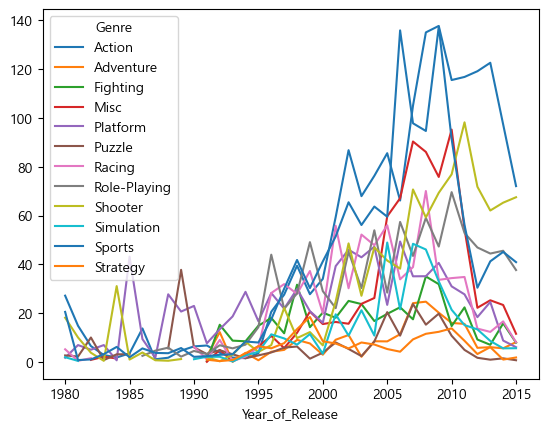

In [20]:
df_Year_Genre_Global.unstack().plot()

In [21]:
grouped_df2 = video_games_fin.groupby(['Year_of_Release','Genre'],as_index=True)['NA_Sales'].sum()
grouped_df2

Year_of_Release  Genre       
1980.0           Action          15.90
                 Adventure        3.74
                 Fighting         1.90
                 Misc            10.22
                 Platform         1.06
                                 ...  
2015.0           Role-Playing    13.93
                 Shooter         31.94
                 Simulation       1.20
                 Sports          18.77
                 Strategy         0.58
Name: NA_Sales, Length: 382, dtype: float64

<AxesSubplot:xlabel='Year_of_Release'>

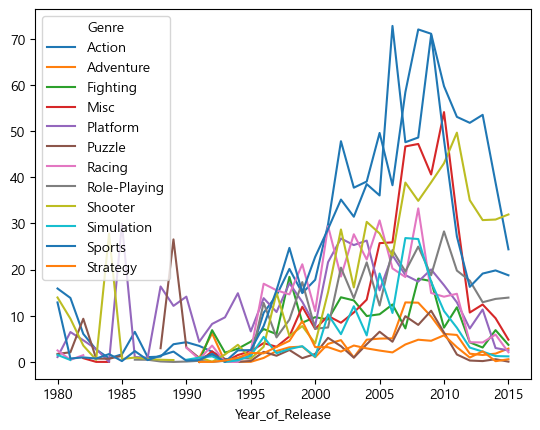

In [22]:
grouped_df2.unstack().plot()

In [23]:
video_games_fin.groupby("Genre")['Name'].count()

Genre
Action          3186
Adventure       1244
Fighting         831
Misc            1691
Platform         872
Puzzle           579
Racing          1224
Role-Playing    1443
Shooter         1274
Simulation       851
Sports          2297
Strategy         667
Name: Name, dtype: int64

In [24]:
group = video_games_fin.groupby("Genre").sum()
group

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,
Action,6394625.0,869.46,508.37,153.91,181.50,1714.22
Adventure,2497625.0,104.18,62.17,51.06,16.12,233.61
Fighting,1665439.0,219.85,97.89,86.73,35.38,439.83
Misc,3393476.0,400.94,210.03,107.03,74.15,792.74
Platform,1746967.0,444.21,198.48,130.72,50.65,824.39
Puzzle,1160740.0,122.87,50.00,57.31,12.38,243.01
Racing,2453109.0,358.62,234.73,56.70,75.82,726.06
Role-Playing,2895357.0,324.92,184.43,348.75,58.23,916.18
Shooter,2554567.0,575.99,301.41,37.70,99.09,1014.67


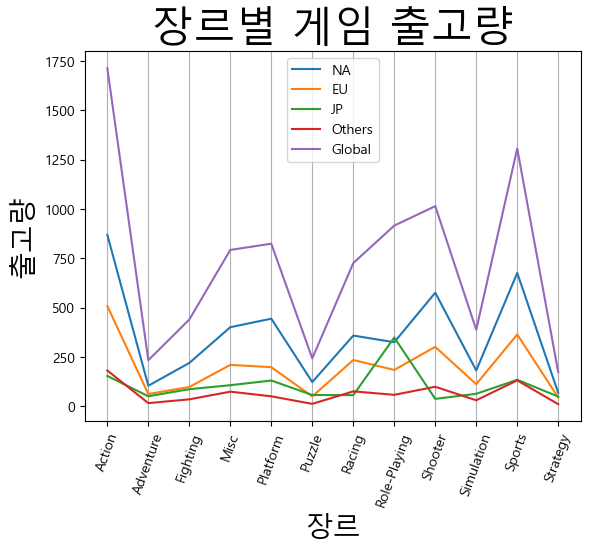

In [25]:
group = video_games_fin.groupby("Genre").sum()
plt.plot(group['NA_Sales'],label="NA")
plt.plot(group['EU_Sales'],label="EU")
plt.plot(group['JP_Sales'],label="JP")
plt.plot(group['Other_Sales'],label="Others")
plt.plot(group['Global_Sales'],label="Global")
plt.xlabel('장르',fontsize=20)
plt.ylabel('출고량',fontsize=20)
plt.xticks(rotation=70)
plt.grid(axis='x')
plt.title("장르별 게임 출고량",fontsize=30)
plt.legend()
plt.show()

In [26]:
f_exp_G = [group['Global_Sales'][x]/(group['Global_Sales'].sum()) for x in range(0,len(group))]
f_exp_G

[0.19540481450324076,
 0.026629323375122256,
 0.050136446642181504,
 0.09036483803088231,
 0.09397263771763638,
 0.027700834182562643,
 0.08276395072874135,
 0.10443582676178034,
 0.11566275223250416,
 0.04422831843477349,
 0.14897305948252867,
 0.019727197908046133]

In [27]:
group = video_games_fin.groupby("Genre").sum()
# 전세계(Global)출고량중 장르별 출고량 비율
f_exp_G = [group['Global_Sales'][x]/(group['Global_Sales'].sum()) for x in range(0,len(group))]
# 북미(NA)출고량중 장르별 출고량 비율
f_exp_NA = [group['NA_Sales'][x]/(group['NA_Sales'].sum()) for x in range(0,len(group))]
# 유럽(EU)출고량중 장르별 출고량 비율
f_exp_EU = [group['EU_Sales'][x]/(group['EU_Sales'].sum()) for x in range(0,len(group))]
# 일본(JP)출고량중 장르별 출고량 비율
f_exp_JP = [group['JP_Sales'][x]/(group['JP_Sales'].sum()) for x in range(0,len(group))]
# 기타지역(Other)출고량중 장르별 출고량 비율
f_exp_Other = [group['Other_Sales'][x]/(group['Other_Sales'].sum()) for x in range(0,len(group))]

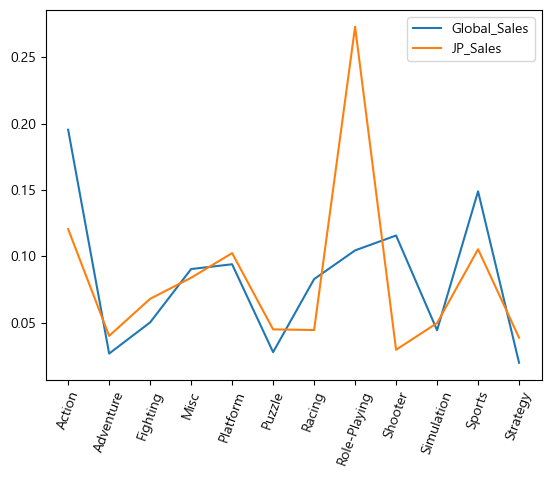

In [28]:
plt.plot(f_exp_G,label='Global_Sales')
plt.plot(f_exp_JP,label='JP_Sales')
plt.legend()
x = range(0,12)
labels = ['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy']
plt.xticks(x,labels,rotation = 70)
plt.show()

In [29]:
# 1 sample chi_square test

group = video_games_fin.groupby("Genre").sum()
f_obs_JP = [group['JP_Sales'][x]/(group['JP_Sales'].sum()).sum() for x in range(0,len(group))] # 일본지역(JP) 출고량 중 장르별 출고량 비중
print('statistic:',stats.chisquare(f_obs_JP,f_exp_G)[0])
print('p-value:',stats.chisquare(f_obs_JP,f_exp_G)[1])
print('''
=> 귀무가설(H0) : 전체출고량의 분포와 일본지역(JP) 판매량의 분포의 차이가 없다
   대립가설(H1) : 전체출고량의 분포와 일본지역(JP) 판매량의 분포의 차이가 있다.

=> p-value가 0.9999로 0.05보다 크므로 이므로 귀무가설을 기각하지 못한다.
   전체 전체출고량의 분포와 일본지역(JP)판매량의 분포에는 차이가 없다.
   즉, 일본지역(JP)에는 전세계적 장르분포와 비교하였을때 특별히 선호하는 게임장르가 없는것으로 볼 수 있다.''')

statistic: 0.4393539061397422
p-value: 0.9999993080854369

=> 귀무가설(H0) : 전체출고량의 분포와 일본지역(JP) 판매량의 분포의 차이가 없다
   대립가설(H1) : 전체출고량의 분포와 일본지역(JP) 판매량의 분포의 차이가 있다.

=> p-value가 0.9999로 0.05보다 크므로 이므로 귀무가설을 기각하지 못한다.
   전체 전체출고량의 분포와 일본지역(JP)판매량의 분포에는 차이가 없다.
   즉, 일본지역(JP)에는 전세계적 장르분포와 비교하였을때 특별히 선호하는 게임장르가 없는것으로 볼 수 있다.


## 2. 게임시장의 연도별 트랜드(장르, 플랫폼)는 어떠한가?

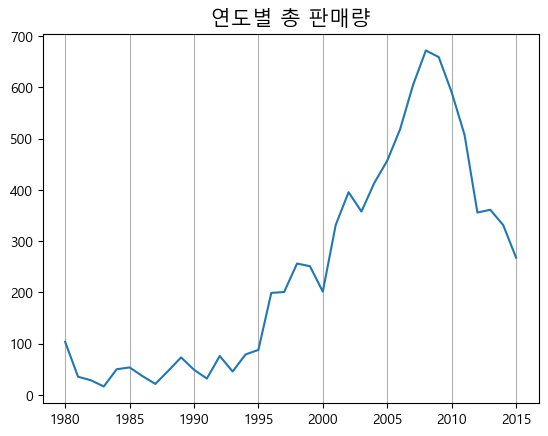

In [30]:
# 연도별 총 출고량 시각화
plt.plot(video_games_fin.groupby('Year_of_Release')['Global_Sales'].sum())
plt.title("연도별 총 판매량",fontsize=15)
plt.grid(axis='x')
plt.show()

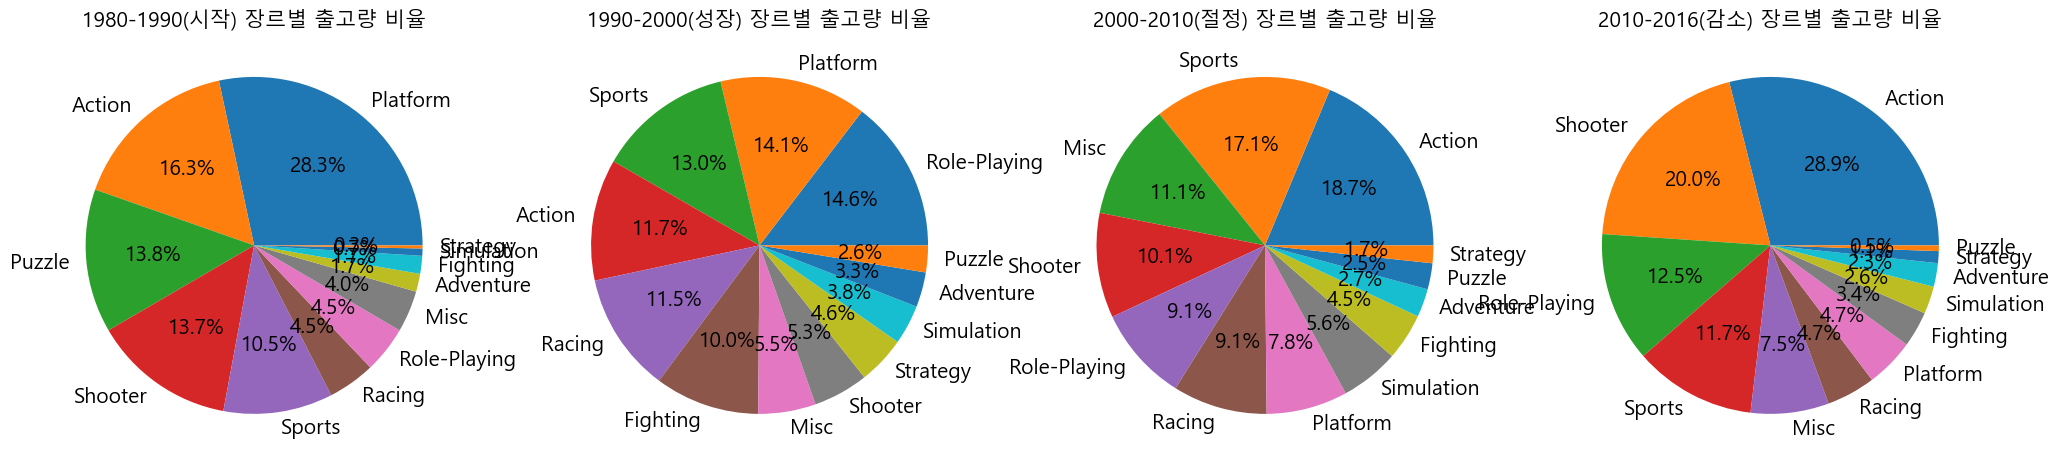

In [34]:
fig, ax = plt.subplots(1, 4, figsize = (25,25))
# 1980-1990(시작) 장르별 출고량
ratio1980 = video_games_fin[video_games_fin['Year_of_Release'] <= 1990].groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
labels1980 = ratio1980.index
ax[0].pie(ratio1980,labels =labels1980, autopct='%.1f%%',textprops={'fontsize': 15})
ax[0].set_title('1980-1990(시작) 장르별 출고량 비율',fontsize = 15)

# 1990-2000(성장) 장르별 출고량
ratio1990 = video_games_fin[(video_games_fin['Year_of_Release'] > 1990)&(video_games_fin['Year_of_Release'] <= 2000)].groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
labels1990 = ratio1990.index
ax[1].pie(ratio1990,labels =labels1990, autopct='%.1f%%',textprops={'fontsize': 15})
ax[1].set_title('1990-2000(성장) 장르별 출고량 비율',fontsize = 15)

# 2000-2010(절정) 장르별 출고량 비율
ratio2000 = video_games_fin[(video_games_fin['Year_of_Release'] > 2000)&(video_games_fin['Year_of_Release'] <= 2010)].groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
labels2000 = ratio2000.index
ax[2].pie(ratio2000,labels =labels2000, autopct='%.1f%%',textprops={'fontsize': 15})
ax[2].set_title('2000-2010(절정) 장르별 출고량 비율',fontsize = 15)

# 2010-2016(감소) 장르별 출고량 비율
ratio2010 = video_games_fin[(video_games_fin['Year_of_Release'] > 2010)&(video_games_fin['Year_of_Release'] <= 2020)].groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
labels2010 = ratio2010.index
ax[3].pie(ratio2010,labels =labels2010, autopct='%.1f%%',textprops={'fontsize': 15})
ax[3].set_title('2010-2016(감소) 장르별 출고량 비율',fontsize = 15)

plt.show()

In [35]:
Genre_col = video_games_fin['Genre'].unique()
Genre_col

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

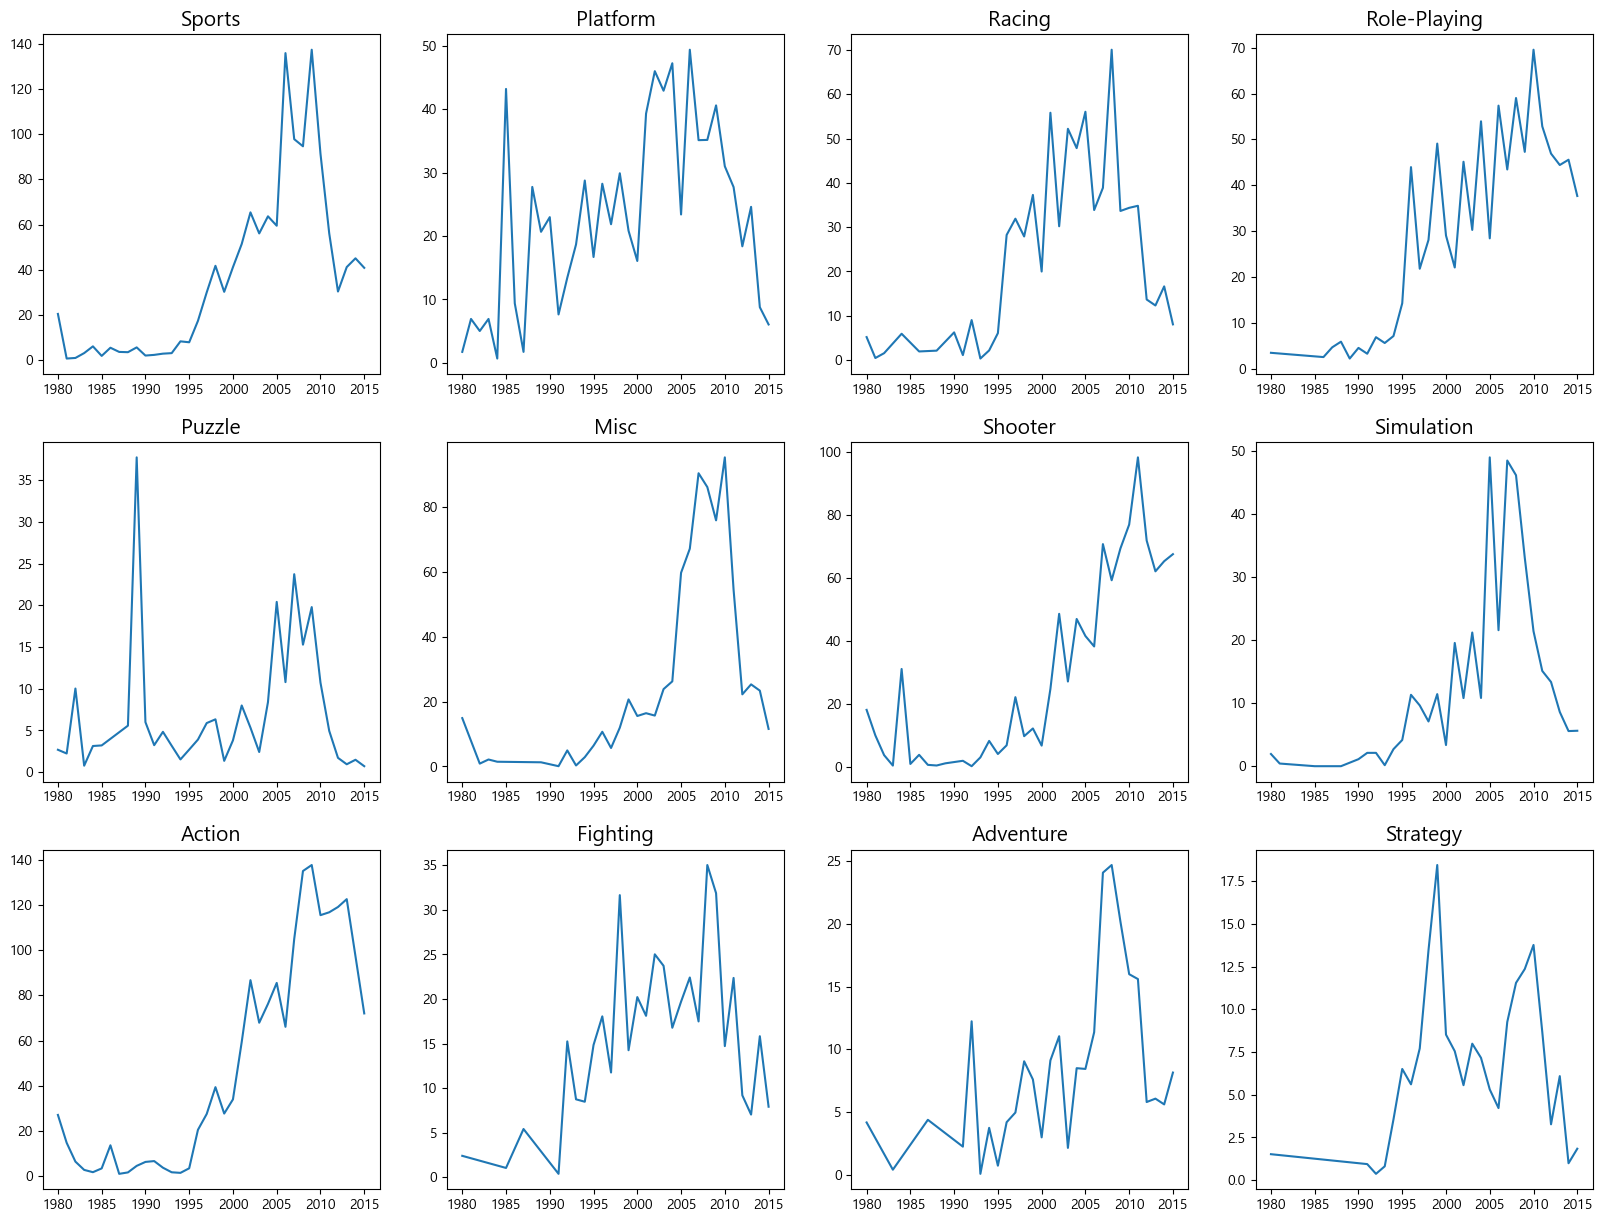

In [36]:
# 장르별 트랜드는 어떠한가?

plt.figure(figsize=(20,15))
Genre_col = video_games_fin['Genre'].unique()
for i,genre_name in enumerate(Genre_col):
  plt.subplot(3,4,1+i)
  plt.plot(video_games_fin[video_games_fin['Genre'] == Genre_col[i]].groupby('Year_of_Release')['Global_Sales'].sum())
  plt.title(str(genre_name),fontsize=15)
plt.show()

In [37]:
# 연대별로 비디오 게임 장르의 트랜드가 변화하는가?
t = video_games_fin[video_games_fin['Year_of_Release'] <= 1990].groupby('Genre')['Global_Sales'].sum()
t['Strategy'] = 0

trend = pd.DataFrame([t,
                video_games_fin[(video_games_fin['Year_of_Release'] > 1990)&(video_games_fin['Year_of_Release'] <= 2000)].groupby('Genre')['Global_Sales'].sum(),
                video_games_fin[(video_games_fin['Year_of_Release'] > 2000)&(video_games_fin['Year_of_Release'] <= 2010)].groupby('Genre')['Global_Sales'].sum(),
                video_games_fin[(video_games_fin['Year_of_Release'] > 2010)&(video_games_fin['Year_of_Release'] <= 2020)].groupby('Genre')['Global_Sales'].sum()],
                index = ['1980','1990','2000','2010'])

print('\nchi_square statistics:',stats.chi2_contingency(trend)[0])
print('p-value:',stats.chi2_contingency(trend)[1])
print(trend)
stats.chi2_contingency(trend)

# 귀무가설 (H0): 연대와 장르사이에 관련이 없다.(비디오 게임 장르의 트랜드는 변하지 않는다)
# 대립가설 (H1): 연대와 장르사이에 관련이 있다.(비디오 게임 장르의 트랜드는 변한다)

# 카이제곱 검정을 시행한 결과 p-value값이 < 2.2e-16이 나왔다.
# 비디오 게임장르에서 트랜드가 없다는 귀무가설을 기각한다.
# 즉, 비디오게임 시장에서 게임장르의 트랜드는 계속해서 변화하는 것으로 판단할 수 있다


chi_square statistics: 1289.8033427434164
p-value: 5.824967232314992e-250
Genre  Action  Adventure  Fighting    Misc  Platform  Puzzle  Racing  \
1980    84.40       8.95      8.88   20.63    146.98   71.42   23.56   
1990   166.93      47.79    143.68   79.08    202.00   36.81  164.13   
2000   935.12     135.63    224.91  556.18    389.90  124.95  452.83   
2010   527.77      41.24     62.36  136.85     85.51    9.83   85.54   

Genre  Role-Playing  Shooter  Simulation  Sports  Strategy  
1980          23.22    70.86        3.61   54.42      0.00  
1990         209.02    75.76       54.29  185.65     65.94  
2000         456.53   503.28      281.78  853.05     84.73  
2010         227.41   364.77       48.32  213.77     20.87  


(1289.8033427434164,
 5.824967232314992e-250,
 33,
 array([[101.02811546,  13.76788163,  25.92152467,  46.72039076,
          48.58569384,  14.3218737 ,  42.79058319,  53.99536747,
          59.79990778,  22.8669067 ,  77.0219889 ,  10.10976591],
        [279.68838231,  38.11529616,  71.76169989, 129.34172288,
         134.50566759,  39.64897959, 118.46236006, 149.48192303,
         165.55133581,  63.30523056, 213.22931126,  27.98809085],
        [976.97644956, 133.14012693, 250.67001424, 451.80216695,
         469.84028611, 138.49741982, 413.79958288, 522.1536813 ,
         578.28557249, 221.1308131 , 744.82899054,  97.76489608],
        [356.52705268,  48.58669528,  91.4767612 , 164.87571942,
         171.45835246,  50.54172689, 151.00747387, 190.5490282 ,
         211.03318392,  80.69704964, 271.8097093 ,  35.67724715]]))

## 실험중

In [116]:
video_games_fin['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [177]:
ex = video_games_fin[['Platform']].replace('PS3','PS_SUM',inplace=False).replace('PS2','PS_SUM',inplace=False).replace('PS4','PS_SUM',inplace=False)
ex['Platform'].unique()
ex.value_counts()

Platform
PS_SUM      3879
DS          2146
Wii         1319
X360        1259
PSP         1207
PS          1194
PC           968
XB           824
GBA          796
GC           556
3DS          519
PSV          428
N64          319
XOne         247
SNES         239
SAT          173
WiiU         147
2600         133
NES           98
GB            98
DC            52
GEN           27
NG            12
SCD            6
WS             6
3DO            3
TG16           2
GG             1
PCFX           1
dtype: int64

In [203]:
plat_pie = pd.DataFrame(ex.value_counts())
plat_pie.index, plat_pie.values 

(MultiIndex([('PS_SUM',),
             (    'DS',),
             (   'Wii',),
             (  'X360',),
             (   'PSP',),
             (    'PS',),
             (    'PC',),
             (    'XB',),
             (   'GBA',),
             (    'GC',),
             (   '3DS',),
             (   'PSV',),
             (   'N64',),
             (  'XOne',),
             (  'SNES',),
             (   'SAT',),
             (  'WiiU',),
             (  '2600',),
             (   'NES',),
             (    'GB',),
             (    'DC',),
             (   'GEN',),
             (    'NG',),
             (   'SCD',),
             (    'WS',),
             (   '3DO',),
             (  'TG16',),
             (    'GG',),
             (  'PCFX',)],
            names=['Platform']),
 array([[3879],
        [2146],
        [1319],
        [1259],
        [1207],
        [1194],
        [ 968],
        [ 824],
        [ 796],
        [ 556],
        [ 519],
        [ 428],
        [ 319],
    

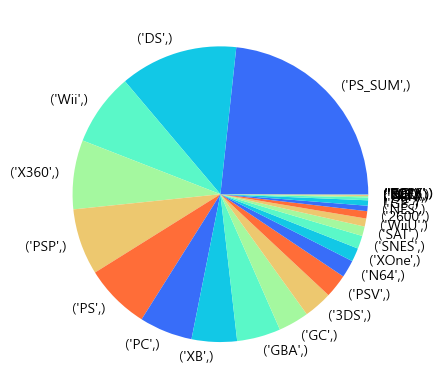

In [208]:
plt.pie(ex.value_counts().values, labels=plat_pie.index)
plt.show()

In [38]:
# 공부중
data_year_genre = video_games_fin.groupby(['Year_of_Release','Genre'])['Global_Sales'].sum().unstack().reset_index()
data_year_genre.columns
# data_year_genre

Index(['Year_of_Release', 'Action', 'Adventure', 'Fighting', 'Misc',
       'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation',
       'Sports', 'Strategy'],
      dtype='object', name='Genre')

ValueError: Could not interpret value `Year_of_Release` for parameter `x`

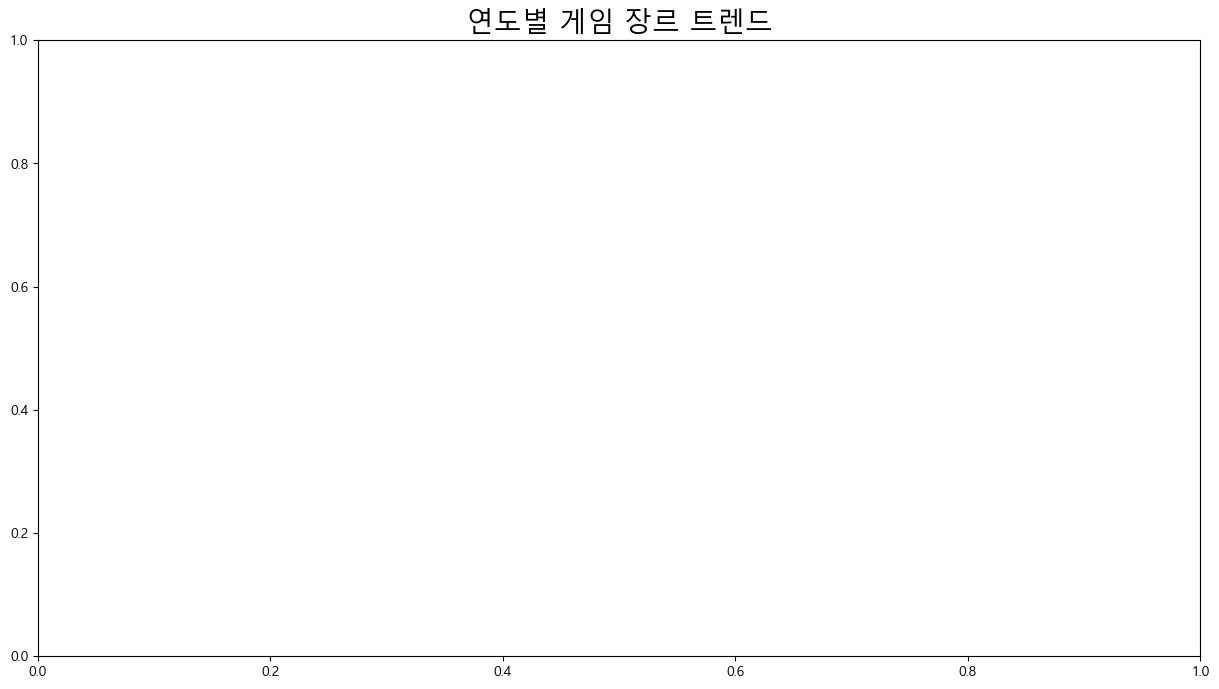

In [39]:
# seaborn을 이용한 시각화
sns.set_palette('rainbow')
color = ['']
plt.figure(figsize=(15, 8))
plt.title('연도별 게임 장르 트렌드', fontsize=20)
data_year_genre = video_games_fin.groupby(['Year_of_Release','Genre'],as_index=False)['Global_Sales'].sum().unstack().reset_index()
genre = data_year_genre.columns
for i in range(1, len(genre)):
    sns.lineplot(data=data_year_genre, x = 'Year_of_Release', y=genre[i], label=genre[i])